## Johdantotehtävä 1, kierros 3

Tehtävän 1 tavoiteena on varmistaa että jokainen on saanut oman "token" -tunnisteen aktivoitua qiskit-palvelussa. Ohje tokenin aktivointiin:


Alla on yksinkertaisen kvanttipiirin koodi, jotka käsittelimme jo kierroksen 2 laskuharjoituksissa. Suorita ja simuloi koodi ja lähetä koodi sen jälkeen oikealle kvanttitietokoneelle laskettavaksi. Voit halutessasi ohje koodata koodin myös itse seuraavan tuotriaalin avulla.


<a href="https://youtu.be/RrUTwq5jKM4" target="_blank">Ensimmäinen kvanttipiiriä ohjaava "Hello World" ohjelma. </a>


In [ ]:
# Jos kirjoitat koodin itse, niin aloita tasta. Johdantotehtävä 1
from qiskit import *
# jatka tästä halutessasi.

In [ ]:
# Omaa koodiasi varten, voit halutetessasi kirjoittaa tähän. Alla valmis koodi

In [ ]:
# Omaa koodiasi varten

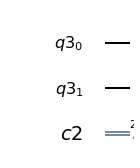

In [15]:
# Valmis esimerkkikoodi tehtävään 1 suoritettavaksi. Etene vaiheittain, suorita koodilohkot.
from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

circuit.draw(output='mpl')

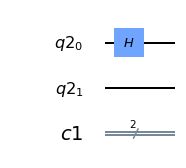

In [7]:
# Hello World jatkuu
# Lisätään Hadamard -portti H 
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

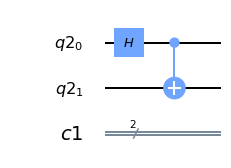

In [8]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla.
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')


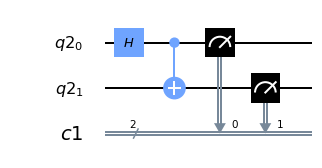

In [10]:
#mittaaminen
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

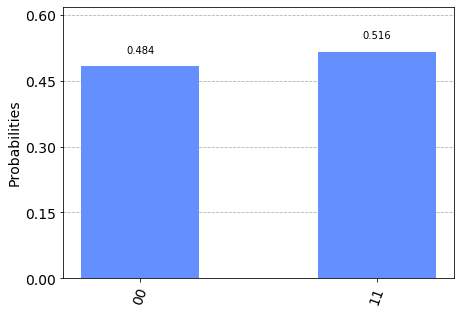

In [11]:
#simulaatio
simulator=Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [13]:
#Lahetetaan koodi oikealle kvanttikoneelle. Ole karsivallinen, odota kvanttitietokoneen vastausta.
# Kun Jupyter odottaa vastausta, välilehdellä näkyy tiimalasi..
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_16_melbourne')
job=execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


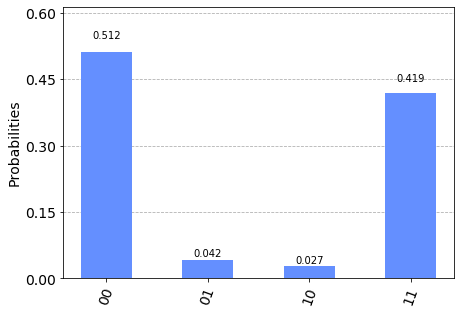

In [14]:
result=job.result()
plot_histogram(result.get_counts(circuit))

## Tehtävä 2, kierros 3

Tehtävässä 2 rakennetaan tutoriaalin avulla kvanttipiiri, joka ratkaisee binaarimuotoisen salasanan yhdellä yrityksellä. Salasana koostuu vain 0:sta ja 1:stä, salasanan pituus voi vaihdella. 


### Klassinen tausta: 
Jos salasana koostuu 6 bitistä, kuten esimerkkiksi 101001, niin erilaisia salasanoja on $2^6 =64$ kappaletta, ja klassisella tietkoneella tarvitaan salasanan selvittämiseen 6 AND -operaatiota. Jos bittien määrä n kasvaa, niin erilaisia salasanavaihtoehtoja on $2^n$ kappaletta, eli vaihtoehtojen määrä kasvaa eksponentaalisesti, ja klassinen tietokone tarvitsee salasanan selvittämiseen $n$ kappaletta AND-operaatiota. 

### Bersntein-Vazirani-algoritmi
Kvanttipiiri ratkaisee $n$ bitistä muodostetun salasanan yhdellä yrityksellä.

a) Seuraa tutoriaalin ohjetta, ja rakenna 6 bitistä muodustuvan salasanan ratkaisemiseen tarvittava kvanttipiiri vaiheittain alla olevan tutoriaalin avulla.

<a href="https://youtu.be/sqJIpHYl7oo" target="_blank">Bernstein - Vazirani -algorimin tutoriaali </a>

b) Simuloi kvanttipiirin toiminta, ohjeet tutoriaalissa.

c) Tee tutoriaalin loppuosassa oleva yleisempi algoritmi, jolla voit ratkaista $n$:stä bitistä koostuvan salasanan yhdellä yrityksellä. Tarkista piirin toiminta simuloimalla piiri.

d) Perustele lyhyesti piirin toiminta.

OHJE A ja B kohdat:
Jos sinulla on vaikeuksia kirjoittaa virheetöntä koodia Youtube-videosta, niin voit kopioida vaiheittain koodin tästä tietodostosta:

<a href="https://kvanttilaskenta.net/hub/static/content/Bernstein_Vazirani_algorithm.ipynb" target="_blank">Bernstein_Vazirani_algorithm.ipynb </a>

C-kohta:
<a href="https://kvanttilaskenta.net/hub/static/content/Bernstein_Vazirani_algorithm_advanced.ipynb" target="_blank">Bernstein_Vazirani_algorithm_advanced.ipynb </a>


Yritä kuitenkin koodata itse, näin opit paremmin.


In [17]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/sqJIpHYl7oo", width=1920/2, height=1080/2)

In [ ]:
# Vastuskenttä tehtävään 2. Voit myös tehdä oman jupyter notebook-tiedoston.
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
# jatka tästä koodin kirjoittamista tutoriaalivideon avulla..

In [ ]:
# Voit kirjoittaa koodia myös tähän, tai luo oma jupyter notebook

In [ ]:
# Koodiasi varten

## Tehtävä 3, kierros 3
Tehtävässä kolme tutustutaan kvanttipiirin avulla toteutettuun teleportaatioon.

### Quantum teleportation eli kvanttiteleportaatio
Kvanttiteleportaatiossa siirretään informaatiota kubittien välillä. Kvanttiteleportaatio perustuu kubittien lomittumiseen, eli siihen, että kubitit voivat vuorovaikuttaa eli vaihtaa informaatiota keskenään.

Tässä tutoriaalissa teleportatataan kvanttitila $\vert\psi\rangle$ (kubitti 0) Alicelta to Bobille seuraavien vaiheiden kautta: 

Alice ja Bob luovat ensin ns. Bellin parin eli lomituksen kahden kubitin välille Hadamard H ja CNOT portin avulla.

Alice suorittaa sarjan operaatioita siirrettävän kvanttilan $\vert\psi\rangle$ (kubitti 0) ja hänen Bellin parinsa (kubitti 1) kesken. 

Alice mittaa kubittien 0 ja 1 tilat raportoi tulokset Bobille.

Alicen vastauksen ohjaamana Bob operoi omaa Bellin pariaan (kubitti 2) eri porteilla. Kubitin 2 tila määräytyy kvanttilan $\vert\psi\rangle$ teleportaation kautta.



Katso tutoriaalivideo ja rakenna 3:n kubitin systeemi. Simuloi piirin toiminta.




Tutoriaalivideo (alla) :
<a href="https://youtu.be/mMwovHK2NrE" target="_blank">Kvanttiteleportaation tutoriaali </a>


OHJE:
Jos sinulla on vaikeuksia koodata tutoriaalivideon avulla, niin voit käyttää apuna linkin tiedostoa:
<a href="http://kvanttilaskenta.net/hub/static/content/quantum_teleportation.ipynb" target="_blank">quantum_teleportation.ipynb </a>


In [16]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/mMwovHK2NrE", width=1920/2, height=1080/2)

In [ ]:
# Kirjoita koodisi tähän, tai rakenna koodi erilliseen tiedostoon.

## Tehtävä 4, kierros 3  
Tehtävä oli jo kierroksella 2. Tehtävää ei tarvitse tehdä  uudestaan jos teit sen jo kierroksella 2.
Kubittien tilat $\ket +$ ja $\ket -$ määritettiin
$$
 \ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1), \\
 \ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1). 
$$

Z-portin (ns. phase-flip gate) matriisiesitys on seuraava:

$$
Z=  \pmatrix {1 & 0 \\ 0 & -1}
$$

Osoita seuraavat yhtälöt oikeiksi laskemalla matriisien tulo:

$$
\begin{align}
Z\ket + &= \ket - \text{ja}\\
Z\ket - &= \ket +
\end{align}
$$

## Tehtävä 5 Unitaarinen matriisi

Kompleksinen matriisi $A$ on unitaarinen, jos sen kompleksikonjukaatin transpoosi on $A$:n käänteismatriisi , eli

$$
A^{-1}=  A^{*T}
$$

Kun matriisi $A$ on unitaarinen, on kuvaus $y=Ax$ unitaarinen kuvaus.

Reaalimatriisi $A$ on unitaarinen, jos $A$:n transpoosi on $A$:n käänteismatriisi eli 

$$
A^{-1}=A^{T}
$$.

Esimerkki:
Jos
$$
A= \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ -1 & 1} 
$$

jolloin on voimassa:
$$
A^{-1}=A^{T} =\frac{1}{\sqrt 2} \pmatrix {1 & -1 \\ 1 & 1} 
$$

Kun matriisi $A$ transponoidaan, niin 1.vaakarivi muuttuu 1.pystyriviksi, ja 2.vaakarivi muuttuu 2.pystyriviksi.

Tehtävä: Tutki onko ns. Pauli Y -matriisi eli Y-portin toimintaa kuvaava matriisi unitaarinen? Paulin Y-matriisi määritellään seuraavasti:


$$
Y=  \pmatrix {0 & -i \\ i & 0} 
$$


missä $i$ on imaginääriyksikkö.


Ohje:
1) Muodosta ensin matriisin $Y$ kompleksikonjukaatti vaihtamalla imaginäärilukujen etumerkki. 2) Transponoi kompleksikonjukaatti $Y^{*}$. 3) Laske tulo $YY^{*T}$, ja tutki onko tulos yksikkömatriisi:

$$
YY^{*T}= I
$$
missä $I$ on identtinen matriisi.


<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Kompleksilukujen laskutoimitukset</a>




Kirjoita vastauksesi tähän.


### Tehtävän 5 vastaus